Look Into The Datas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dim_data = pd.read_csv('../EDA-Hospitality/datasets/dim_date.csv')
dim_hotels = pd.read_csv('../EDA-Hospitality/datasets/dim_hotels.csv')
dim_rooms = pd.read_csv('../EDA-Hospitality/datasets/dim_rooms.csv')
fact_agg_bookings = pd.read_csv('../EDA-Hospitality/datasets/fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('../EDA-Hospitality/datasets/fact_bookings.csv')
new_aug_data = pd.read_csv('../EDA-Hospitality/datasets/new_data_august.csv')

In [2]:
dim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [3]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [4]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [5]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [6]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [7]:
new_aug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          7 non-null      int64  
 1   property_name        7 non-null      object 
 2   category             7 non-null      object 
 3   city                 7 non-null      object 
 4   room_category        7 non-null      object 
 5   room_class           7 non-null      object 
 6   check_in_date        7 non-null      object 
 7   mmm yy               7 non-null      object 
 8   week no              7 non-null      object 
 9   day_type             7 non-null      object 
 10  successful_bookings  7 non-null      int64  
 11  capacity             7 non-null      int64  
 12  occ%                 7 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 860.0+ bytes


Let look more deep into fact_bookings dataset

In [9]:
fact_bookings.shape

(134590, 12)

so it has 134590 rows and 12 cols

In [10]:
fact_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [11]:
fact_bookings['room_category'].value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

room category RT2 is booked most offen and here we have 4 different room type

In [12]:
fact_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

we are getting booking majorly from 3rd party website or app and very less traffic in offline booking and also direct online booking from company own website or app

<Axes: xlabel='booking_platform', ylabel='count'>

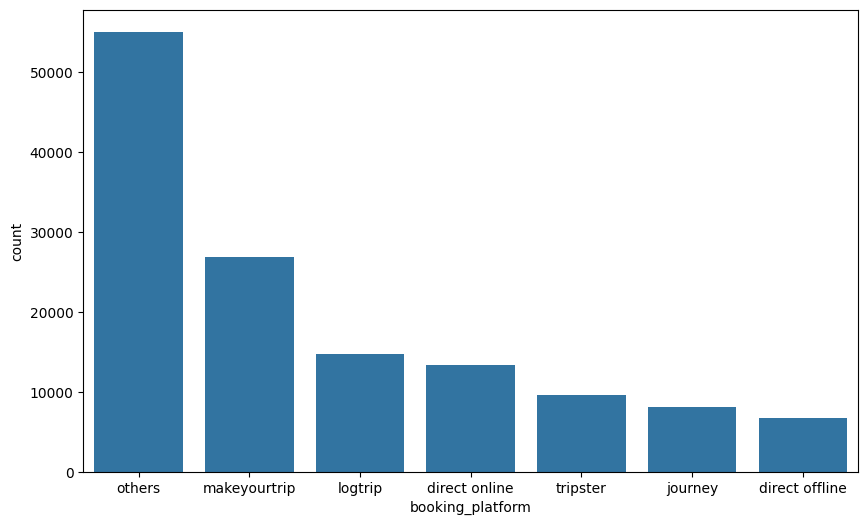

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(fact_bookings['booking_platform'].value_counts())

In [24]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [25]:
fact_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,134590.0,18061.113493,1093.055847,16558.0,17558.0,17564.0,18563.0,19563.0
no_guests,134587.0,2.036170,1.034885,-17.0,1.0,2.0,2.0,6.0
ratings_given,56683.0,3.619004,1.235009,1.0,3.0,4.0,5.0,5.0
revenue_generated,134590.0,15378.054127,93036.038671,6500.0,9900.0,13500.0,18000.0,28560000.0
revenue_realized,134590.0,12696.123256,6928.108124,2600.0,7600.0,11700.0,15300.0,45220.0


In [26]:
dim_hotels.shape

(25, 4)

In [29]:
dim_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [27]:
dim_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

here we have total of 25 different hotels out of which 16 are of luxury type

In [36]:
dim_hotels['city'].value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [37]:
pivot_table = pd.pivot_table(dim_hotels,values='property_name',index=['city'],columns=['category'],aggfunc='count')
pivot_table

category,Business,Luxury
city,,
Bangalore,2,4
Delhi,2,3
Hyderabad,2,4
Mumbai,3,5


In [53]:
df_copy_hotels = dim_hotels.copy()
df_copy_hotels['count'] = 1
df_copy_hotels

,property_id,property_name,category,city,count
0,16558,Atliq Grands,Luxury,Delhi,1
1,16559,Atliq Exotica,Luxury,Mumbai,1
2,16560,Atliq City,Business,Delhi,1
3,16561,Atliq Blu,Luxury,Delhi,1
4,16562,Atliq Bay,Luxury,Delhi,1
5,16563,Atliq Palace,Business,Delhi,1
6,17558,Atliq Grands,Luxury,Mumbai,1
7,17559,Atliq Exotica,Luxury,Mumbai,1
8,17560,Atliq City,Business,Mumbai,1
9,17561,Atliq Blu,Luxury,Mumbai,1


<Axes: xlabel='city', ylabel='count'>

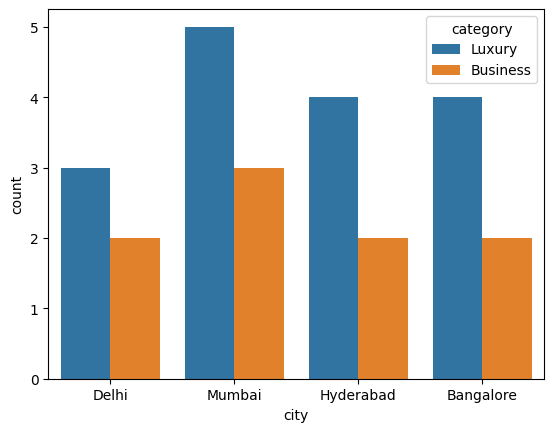

In [62]:
sns.barplot(df_copy_hotels,x='city',y='count',estimator='sum',hue='category')

In [68]:
# unique property ids in agg_bookings

print(f'unique list - {fact_agg_bookings["property_id"].unique()}')
print(f'unique Value count - {len(fact_agg_bookings["property_id"].unique())}')

unique list - [16559 19562 19563 17558 16558 17560 19558 19560 17561 16560 16561 16562
 16563 17559 17562 17563 18558 18559 18561 18562 18563 19559 19561 17564
 18560]
unique Value count - 25


In [70]:
# total booking per property_id

fact_agg_bookings['property_id'].value_counts()

property_id
16559    368
17559    368
17564    368
19561    368
19559    368
18563    368
18562    368
18561    368
18559    368
18558    368
17563    368
17562    368
16563    368
19562    368
16562    368
16561    368
16560    368
17561    368
19560    368
19558    368
17560    368
16558    368
17558    368
19563    368
18560    368
Name: count, dtype: int64

<Axes: xlabel='property_id', ylabel='successful_bookings'>

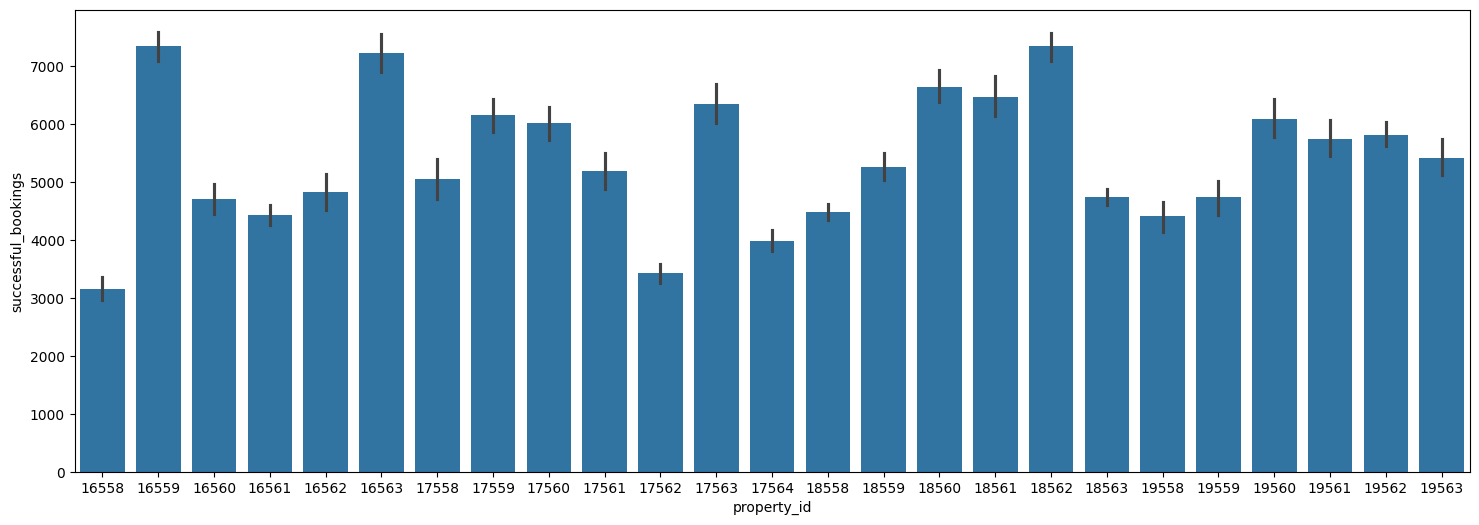

In [75]:
plt.figure(figsize=(18,6))
sns.barplot(fact_agg_bookings,x='property_id',y='successful_bookings',estimator='sum')

In [76]:
# days on which booking are greater then capacity

fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [77]:
df_capacity_booking = fact_agg_bookings.copy()
df_capacity_booking['morethencapacity'] = 'more' if df_capacity_booking['successful_bookings'] > df_capacity_booking['capacity'] else 'less'
df_capacity_booking.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

we are getting the error due to empty values in capacity

In [78]:
fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [80]:
df_capacity_booking = fact_agg_bookings[fact_agg_bookings['successful_bookings']>fact_agg_bookings['capacity']]
df_capacity_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [82]:
# property that have highest capacity

fact_agg_bookings.sort_values('capacity',ascending=False)

,property_id,check_in_date,room_category,successful_bookings,capacity
3128,17558,1-Jun-22,RT2,19,50.0
2128,17558,22-May-22,RT2,38,50.0
1728,17558,18-May-22,RT2,21,50.0
5828,17558,28-Jun-22,RT2,26,50.0
3928,17558,9-Jun-22,RT2,27,50.0
...,...,...,...,...,...
7475,19559,14-Jul-22,RT4,2,3.0
7476,16558,14-Jul-22,RT4,2,3.0
7375,19559,13-Jul-22,RT4,2,3.0
8,17561,1-May-22,RT1,22,NaN


In [91]:
highest_capacity = fact_agg_bookings.groupby('property_id')['capacity'].max()
print(highest_capacity)

property_id
16558    22.0
16559    41.0
16560    34.0
16561    24.0
16562    43.0
16563    41.0
17558    50.0
17559    39.0
17560    45.0
17561    36.0
17562    30.0
17563    44.0
17564    40.0
18558    30.0
18559    44.0
18560    40.0
18561    40.0
18562    38.0
18563    29.0
19558    40.0
19559    41.0
19560    38.0
19561    45.0
19562    30.0
19563    45.0
Name: capacity, dtype: float64


In [93]:
df = pd.DataFrame(highest_capacity)
df

,capacity
property_id,
16558,22.0
16559,41.0
16560,34.0
16561,24.0
16562,43.0
16563,41.0
17558,50.0
17559,39.0
17560,45.0


In [94]:
df[df['capacity'] == df['capacity'].max()]

,capacity
property_id,
17558,50.0


In [105]:
# Ease way

fact_agg_bookings[fact_agg_bookings['capacity'] == fact_agg_bookings['capacity'].max()]['property_id'].unique()

array([17558])